# Assignment
Build the AlexNet architecture and train it on the CIFAR10 dataset.

You may resize some of the kernel sizes (mainly the first one) and the number of kernels because CIFAR100 is a smaller dataset than ImageNet, as well as lower-resolution (32x32 vs 224x224).

You may resize the number of kernels used per layer if it speeds up training and/or preserves accuracy. The exact AlexNet architecture and number of units will not work.

Report training, validation and test errors. Which hyperparameters did you change to improve performance?

**MAKE SURE YOU USE A GPU!** Top menu select "Runtime", then "Runtime Type". Make sure "Hardware Accelerator" has the option "GPU" selected.

Tips:
- Start with only a few of a layers and check if the network can learn.
- Add units and layers progressively.
- Kernels that are too large or too much pooling will reduce the size of layer ouputs
- Try Batch Norm and Dropout
- If you don't reproduce the exact architecture, that is fine. Explain what you changed and why!.
- Functional API!


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import datetime
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

np.random.seed(10)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

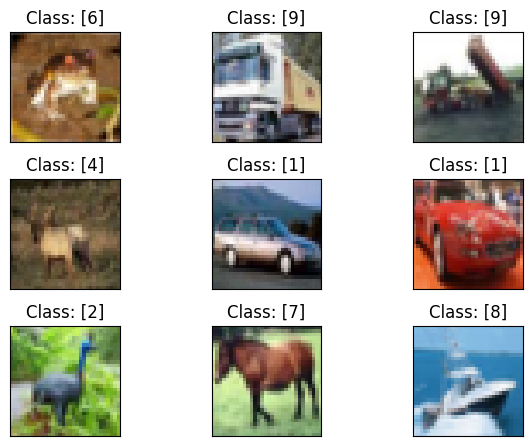

In [3]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train_full[i], interpolation='none')
  plt.title('Class: {}'.format(y_train_full[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
print(X_train_full.shape)
print(y_train_full.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
#Data normalization
X_train_full=X_train_full/255.
X_test=X_test/255.

In [6]:
#One-hot encoded values
y_train_full=keras.utils.to_categorical(y_train_full,10)
y_test=keras.utils.to_categorical(y_test,10)

In [7]:
x_train=X_train_full[:50000]
y_train=y_train_full[:50000]

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
inputs=Input(shape=(32,32,3))

t=Conv2D(filters=32, kernel_size=5, activation='relu')(inputs)

t=BatchNormalization()(t)

t=Conv2D(filters=96, kernel_size=3, padding="same", activation='relu')(t)

t=BatchNormalization()(t)

t=MaxPooling2D(pool_size=(3,3), strides=2)(t)

t=Dropout(rate=0.2)(t)

t=Conv2D(filters=128, kernel_size=1, activation='relu')(t)

t=BatchNormalization()(t)

t=Conv2D(filters=128, kernel_size=1, activation='relu')(t)

t=BatchNormalization()(t)

t=Conv2D(filters=96, kernel_size=1, activation='relu')(t)

t=BatchNormalization()(t)

t=MaxPooling2D(pool_size=(3,3), strides=2)(t)

t=Dropout(rate=0.2)(t)

t=Flatten()(t)

t=Dense(3456, activation='relu')(t)

t=Dropout(rate=0.2)(t)

t=Dense(1728, activation='relu')(t)

t=Dropout(rate=0.2)(t)

outputs=Dense(10, activation='softmax')(t)

model=Model(inputs, outputs)

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=["accuracy"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.000001, verbose=1)

earlyStopping_callback = EarlyStopping(monitor='val_accuracy', patience=10)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 96)        27744     
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 96)        0   

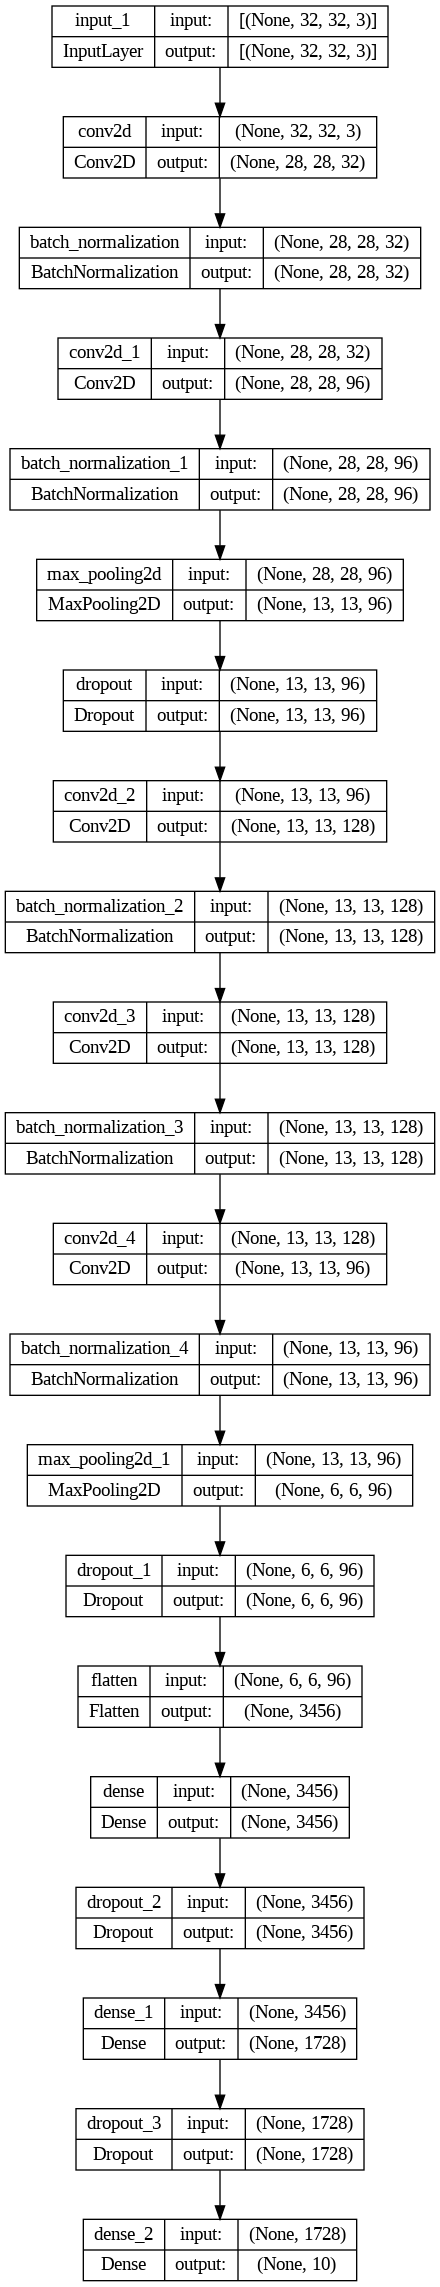

In [11]:
tf.keras.utils.plot_model(
    model,
    to_file='pic.png',
    show_shapes=True,
    show_layer_names=True
)

In [14]:
history=model.fit(x_train, y_train, batch_size=16, epochs=200, validation_split=0.1,
                  callbacks=[earlyStopping_callback, reduce_lr, tensorboard_callback])

Epoch 1/200
2813/2813 [==============================] - 38s 13ms/step - loss: 1.8145 - accuracy: 0.3676 - val_loss: 1.5295 - val_accuracy: 0.4418 - lr: 0.0010
Epoch 2/200
2813/2813 [==============================] - 30s 11ms/step - loss: 1.4440 - accuracy: 0.4810 - val_loss: 1.2936 - val_accuracy: 0.5340 - lr: 0.0010
Epoch 3/200
2813/2813 [==============================] - 30s 11ms/step - loss: 1.3014 - accuracy: 0.5354 - val_loss: 1.1763 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 4/200
2813/2813 [==============================] - 33s 12ms/step - loss: 1.2050 - accuracy: 0.5700 - val_loss: 1.0621 - val_accuracy: 0.6268 - lr: 0.0010
Epoch 5/200
2813/2813 [==============================] - 33s 12ms/step - loss: 1.1267 - accuracy: 0.5999 - val_loss: 1.0593 - val_accuracy: 0.6298 - lr: 0.0010
Epoch 6/200
2813/2813 [==============================] - 31s 11ms/step - loss: 1.0656 - accuracy: 0.6216 - val_loss: 0.9901 - val_accuracy: 0.6486 - lr: 0.0010
Epoch 7/200
2813/2813 [=================

In [21]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

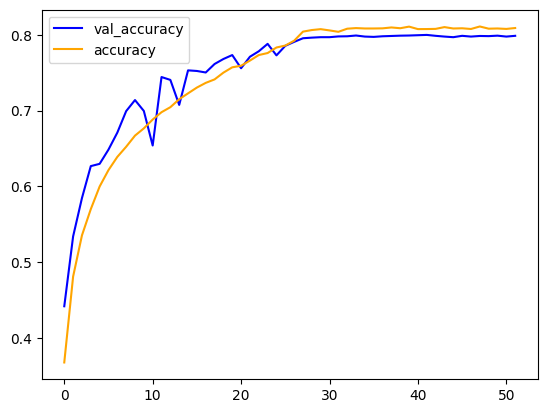

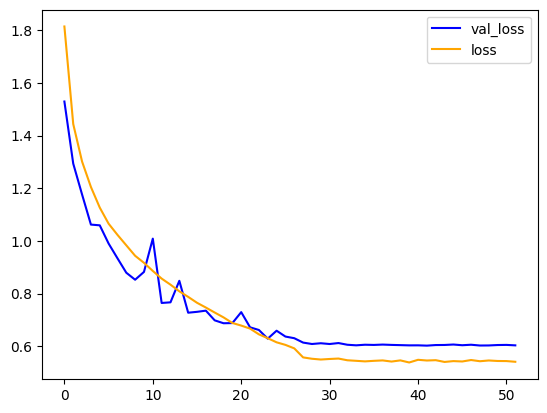

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], 'blue', label='val_accuracy')
plt.plot(history.history['accuracy'], 'orange', label='accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], 'blue', label='val_loss')
plt.plot(history.history['loss'], 'orange', label='loss')
plt.legend()
plt.show()

In [17]:
#Test loss and accuracy
test_loss, test_acc=model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6331 - accuracy: 0.7797


As the size of the given data is much less than the AlexNet's input data, i.e., the given images have size 32x32x3 whileas the AlexNet's input is 227x227x3, hence, significant simplification is required. First of all, I reduced the first convolution layer's kernel size from 11x11 to 5x5. Because this layer serves to heavily reduce the input data's dimension, but in our case, it is not required. Similarly, I used 3x3 kernel in the second convolution layer due to the same reason. The smaller kernel size should be a good simplification.

Morover, the complexity of the given data is much less than that used as an input in the classical AlexNet archtecture. Therefore, the number of frames was reduced as well, 32 vs 96, and 96 vs 256, and 129 vs or 384. size in the second convlolution -the data input was already in smaller in size.

As the given input is much closer to the output of the classical AlexNet, the padding and convolution were applied without high strides, and padding was used just once to fit the sizes of the AlexNet outputs.

Finally, I used kernel 1x1 and only 1 convolution in the last convolution sequance to seriously minimize number of model parameters and computational time. Fully conected layers sizes and their quontity had also be simlified to respect lesser complexity of the model and reduce necessary computational perfromance.


During the training stage, I realized that the usage of batch normalization and dropout rate was necessary to improve learning speed and handlle with overfitting that apparently occurs because of the simplicity. The achieved acuracy is 0.8091, validation accuracy is 0.7988 and test accuracy 0.7797. As the difference between the accuracy values is not significant, hence, the overfitting was avoided.

"Adam" optimizer was chosen as it demonstrated better performance in terms of val_Accuracy. Moreover, a model with smaller batch size showed better results. Furthermore, schedules for learning rate were used to assit the model disrupt a plateau of constant accuracy.